### DSC 681-001 - Fall 2023: Applied Machine Learning
### Final Sprint
### Team TVS
### Submitted by Tirth, Vishal & Sakshi

### Importing all the necessary libraries

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import preprocessing

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBRegressor
from catboost import CatBoostRegressor


from lightgbm import LGBMRegressor

### Loading all the CSV Files

In [2]:
# Read data from CSV files into DataFrames
ccDF_filled = pd.read_csv('current_customers.csv')
cbDF_filled = pd.read_csv('current_billing.csv')
plDF_filled = pd.read_csv('prospect_list.csv')

# Display the first few rows of the ccDF_filled DataFrame
ccDF_filled.head()

,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
0,Y,1475361,1994.0,538046000,Over $5 bil.,69407934.0,5380460.0,15065288.0,4041427,1541000,...,Stock Issuance/Offering,14-May-97,NaN,NaN,Seattle,Washington,98109,United States,37.0,NaN
1,Y,16400573,1998.0,256735000,Over $5 bil.,33118815.0,2567350.0,7188580.0,228090,160000,...,Stock Issuance/Offering,19-Aug-04,Undisclosed,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,94043,United States,91.0,NaN
2,Y,246280,1989.0,63144419,Over $5 bil.,4862120.0,631444.0,2967787.0,1663794,738000,...,Stock Issuance/Offering,18-Jul-01,NaN,NaN,Dublin,Leinster,D02 P820,Ireland,49.0,NaN
3,Y,43076614,1999.0,364115000,Over $5 bil.,18205750.0,3641150.0,10559335.0,139776,62000,...,NaN,NaN,NaN,NaN,Spring,Texas,77389,United States,28.0,NaN
4,Y,126828694,1983.0,136835000,Over $5 bil.,11083635.0,2052525.0,5062895.0,253627,112500,...,NaN,NaN,NaN,NaN,New York City,New York,10036,United States,55.0,NaN


### Cleaning the Data

In [3]:
ccDF = ccDF_filled.fillna(0)

# Display the DataFrame after filling null values with zero
print("\nDataFrame after filling null values with zero:")
ccDF


DataFrame after filling null values with zero:


,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
0,Y,1475361,1994.0,538046000,Over $5 bil.,69407934.0,5380460.0,15065288.0,4041427,1541000,...,Stock Issuance/Offering,14-May-97,0,0,Seattle,Washington,98109,United States,37.0,0
1,Y,16400573,1998.0,256735000,Over $5 bil.,33118815.0,2567350.0,7188580.0,228090,160000,...,Stock Issuance/Offering,19-Aug-04,Undisclosed,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,94043,United States,91.0,0
2,Y,246280,1989.0,63144419,Over $5 bil.,4862120.0,631444.0,2967787.0,1663794,738000,...,Stock Issuance/Offering,18-Jul-01,0,0,Dublin,Leinster,D02 P820,Ireland,49.0,0
3,Y,43076614,1999.0,364115000,Over $5 bil.,18205750.0,3641150.0,10559335.0,139776,62000,...,0,0,0,0,Spring,Texas,77389,United States,28.0,0
4,Y,126828694,1983.0,136835000,Over $5 bil.,11083635.0,2052525.0,5062895.0,253627,112500,...,0,0,0,0,New York City,New York,10036,United States,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Y,372175531,0.0,3951,$1 mil. - $5 mil.,513.0,39.0,209.0,30,13,...,0,0,0,0,Sherwood,Oregon,97140,United States,1.0,0
325,Y,347198798,2008.0,1654,$1 mil. - $5 mil.,133.0,24.0,61.0,18,8,...,0,0,0,0,Kansas City,Missouri,64106,United States,1.0,0
326,Y,32080939,2001.0,232,"Under $500,000",18.0,3.0,8.0,4,2,...,0,0,0,0,Atlanta,Georgia,30342,United States,1.0,0
327,Y,39371338,2002.0,1946,$1 mil. - $5 mil.,251.0,19.0,54.0,34,15,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
plDF = plDF_filled.fillna(0)

# Display the DataFrame after filling null values with zero
print("\nDataFrame after filling null values with zero:")
plDF


DataFrame after filling null values with zero:


,Current_Customer,CompanyID,Founded_Year,Company_HQ_Phone,Fax,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
0,N,2441797,1976.0,(408) 996-1010,(408) 974-2113,387537000.0,Over $5 bil.,31390497.0,5813055.0,14338869.0,...,Share Placement,16-May-16,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,23.0,0
1,N,155353090,1962.0,(479) 273-4000,(479) 277-1830,630794000.0,Over $5 bil.,76956868.0,6307940.0,12615880.0,...,Stock Issuance/Offering,1-Mar-72,0,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,4202.0,0
2,N,24904409,1975.0,(425) 882-8080,(425) 936-7329,204094000.0,Over $5 bil.,26736314.0,2040940.0,7551478.0,...,Other Financing Round,1-Sep-81,Technology Venture Investors,Technology Venture Investors,Redmond,Washington,98052,United States,63.0,0
3,N,10256729,1963.0,(401) 765-1500,0,339204000.0,Over $5 bil.,41382888.0,3392040.0,6784080.0,...,0,0,0,0,Woonsocket,Rhode Island,2895,United States,31.0,0
4,N,141738322,1938.0,+82 312001114,(82)31-200-7538,214420431.0,Over $5 bil.,17368054.0,3216306.0,7933555.0,...,0,0,0,0,Suwon-si,Gyeonggi-do,16677,South Korea,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,N,398742609,2014.0,(269) 350-3242,0,1643.0,$1 mil. - $5 mil.,215.0,16.0,57.0,...,0,0,0,0,Gaylord,Michigan,49734,United States,0.0,0
1925,N,30344865,1932.0,(800) 442-2253,0,1204.0,$1 mil. - $5 mil.,156.0,12.0,63.0,...,0,0,0,0,Manhattan,Illinois,60442,United States,1.0,0
1926,N,478996006,2019.0,(703) 594-6825,0,956.0,"$500,000 - $1 mil.",125.0,9.0,33.0,...,0,0,0,0,Vienna,Virginia,22182,United States,1.0,0
1927,N,500997527,2002.0,(765) 553-5494,0,1144.0,$1 mil. - $5 mil.,92.0,17.0,42.0,...,0,0,0,0,Kokomo,Indiana,46901,United States,1.0,0


In [5]:
cbDF = cbDF_filled.fillna(0)

# Display the DataFrame after filling null values with zero
print("\nDataFrame after filling null values with zero:")
cbDF


DataFrame after filling null values with zero:


,CompanyID,Lifetime_Park Place,Lifetime_Boardwalk,Lifetime_StJamesPlace,Lifetime_Marvin Gardens,Lifetime_Ventnor,Lifetime_Kentucky,Lifetime_Tennessee,Lifetime_Pennslyvania,Last_Month_Park Place,Last_Month_Boardwalk,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania
0,1475361,-0.070063,0.136329,0.000000,0.811350,0.000000,0.000000,1.753205,0.0,-0.148246,-0.085591,0.000000,0.798386,0.000000,0.000000,1.037185,0.0
1,16400573,-0.033258,0.000000,0.000000,0.000000,0.000000,0.000000,0.171361,0.0,-0.110040,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121411,0.0
2,246280,0.000000,0.000000,6.757425,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.405451,0.000000,0.000000,0.000000,0.000000,0.0
3,43076614,0.000000,0.000000,13.025724,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.937410,0.000000,0.000000,0.000000,0.000000,0.0
4,126828694,6.300050,1.515290,4.322832,11.780571,0.240241,0.263761,1.047302,0.0,2.245466,0.590702,0.860277,3.875073,0.175216,-0.051244,0.348938,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,372175531,0.005658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.100852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
324,347198798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.027666,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.135548,0.0
325,32080939,0.000000,0.000000,-0.043088,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.135046,0.000000,0.000000,0.000000,0.000000,0.0
326,39371338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086272,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121995,0.0


### Segregating the data into Categorical and Numeric for Current Customers

In [6]:
aggccDF = ccDF[['Current_Customer','CompanyID','Primary_Industry','Primary_Sub-Industry','All_Industries','All_Sub-Industries','Industry_Hierarchical_Category','All_Investors','Company_City','Company_State','Company_Country','Company_Is_Acquired']]# Creating a new DataFrame 'aggccDF' by selecting only categorical columns from the 'ccDF' DataFrame
aggccDF # Displaying the 'aggccDF' DataFrame containing the selected columns

,Current_Customer,CompanyID,Primary_Industry,Primary_Sub-Industry,All_Industries,All_Sub-Industries,Industry_Hierarchical_Category,All_Investors,Company_City,Company_State,Company_Country,Company_Is_Acquired
0,Y,1475361,Retail,"Department Stores, Shopping Centers & Superstores",Retail,"Department Stores, Shopping Centers & Supersto...",retail,0,Seattle,Washington,United States,0
1,Y,16400573,Software,Content & Collaboration Software,Software,Content & Collaboration Software,software,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,United States,0
2,Y,246280,Business Services,Management Consulting,Business Services,Management Consulting,bizservice,0,Dublin,Leinster,Ireland,0
3,Y,43076614,"Energy, Utilities & Waste","Electricity, Oil & Gas","Energy, Utilities & Waste;Manufacturing","Electricity, Oil & Gas;Chemicals & Related Pro...",energy,0,Spring,Texas,United States,0
4,Y,126828694,Telecommunications,Telephony & Wireless,Telecommunications,Telephony & Wireless,telecom,0,New York City,New York,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
324,Y,372175531,Media & Internet,Broadcasting,Media & Internet,Broadcasting,media,0,Sherwood,Oregon,United States,0
325,Y,347198798,Media & Internet,Data Collection & Internet Portals,Media & Internet,Data Collection & Internet Portals,media,0,Kansas City,Missouri,United States,0
326,Y,32080939,Consumer Services,Automotive Service & Collision Repair,Consumer Services,Automotive Service & Collision Repair,consumerservices,0,Atlanta,Georgia,United States,0
327,Y,39371338,Finance,Banking,Finance;Consumer Services,Banking;Photography Studio,finance,0,0,0,0,0


In [7]:
agg2ccDF = ccDF[['CompanyID','Founded_Year','Revenue_(in_000s_USD)','Est_Marketing_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Employees','Past_1_Year_Employee_Growth_Rate','Past_2_Year_Employee_Growth_Rate','Alexa_Rank','Total_Funding_Amount_(in_000s_USD)','Number_of_Locations']] # Creating a new DataFrame 'agg2ccDF' by selecting only numeric columns from the 'ccDF' DataFrame
agg2ccDF # Displaying the 'agg2ccDF' DataFrame containing the selected columns

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,11.0,48000,37.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,1.0,1925100,91.0
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,3668.0,1700000,49.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,71652.0,0,28.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,543.0,0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,9996367.0,0,1.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,2877105.0,0,1.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,0.0,0,1.0
327,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,0.0,0,0.0


### Segregating the data into Categorical and Numeric for Prospect Customers

In [8]:
numericplDF=plDF[['CompanyID','Founded_Year','Revenue_(in_000s_USD)','Est_Marketing_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Employees','Past_1_Year_Employee_Growth_Rate','Past_2_Year_Employee_Growth_Rate','Alexa_Rank','Total_Funding_Amount_(in_000s_USD)','Number_of_Locations']] # Creating a DataFrame 'numericplDF' by selecting onlu numeric columns from the 'plDF' DataFrame
numericplDF # Displaying the resulting DataFrame 'numericplDF' containing the selected columns

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,89.0,2162250,23.0
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,81.0,6850,4202.0
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,44.0,1000,63.0
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,454.0,0,31.0
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,35.0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,10939808.0,0,0.0
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,0.0,0,1.0
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,0.0,0,1.0
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,0.0,0,1.0


In [9]:
descriptiveplDF=plDF[['Current_Customer','CompanyID','Founded_Year','Employee_Range','Primary_Industry','Primary_Sub-Industry','All_Industries','All_Sub-Industries','Industry_Hierarchical_Category','Secondary_Industry_Hierarchical_Category','Ownership_Type','Business_Model','Certified_Active_Company','All_Investors','Company_City','Company_State','Company_Country','Company_Is_Acquired']] # Creating a DataFrame 'descriptiveplDF' by selecting specific columns from the 'plDF' DataFrame
descriptiveplDF # Displaying the resulting DataFrame 'descriptiveplDF' containing the selected columns 

,Current_Customer,CompanyID,Founded_Year,Employee_Range,Primary_Industry,Primary_Sub-Industry,All_Industries,All_Sub-Industries,Industry_Hierarchical_Category,Secondary_Industry_Hierarchical_Category,Ownership_Type,Business_Model,Certified_Active_Company,All_Investors,Company_City,Company_State,Company_Country,Company_Is_Acquired
0,N,2441797,1976.0,Employees.10000plus,Manufacturing,Computer Equipment & Peripherals,Manufacturing,Computer Equipment & Peripherals,mfg,mfg.computers,Public,B2B,Yes,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,United States,0
1,N,155353090,1962.0,Employees.10000plus,Retail,"Department Stores, Shopping Centers & Superstores",Retail,"Department Stores, Shopping Centers & Supersto...",retail,retail.departmentstore,Public,B2B,Yes,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,United States,0
2,N,24904409,1975.0,Employees.10000plus,Software,Database & File Management Software,Software;Manufacturing,Database & File Management Software;Computer E...,software,software.db,Public,B2B,Yes,Technology Venture Investors,Redmond,Washington,United States,0
3,N,10256729,1963.0,Employees.10000plus,Retail,Drug Stores & Pharmacies,Retail;Consumer Services,Drug Stores & Pharmacies;Apparel & Accessories...,retail,retail.pharmacy,Public,B2C,Yes,0,Woonsocket,Rhode Island,United States,0
4,N,141738322,1938.0,Employees.10000plus,Manufacturing,Telecommunication Equipment,Manufacturing,Telecommunication Equipment;Computer Equipment...,mfg,mfg.telecom,Public,B2B,Yes,0,Suwon-si,Gyeonggi-do,South Korea,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,N,398742609,2014.0,Employees.5to9,Business Services,0,Business Services,Custom Software & IT Services,bizservice,0,Private,B2B,Yes,0,Gaylord,Michigan,United States,0
1925,N,30344865,1932.0,Employees.5to9,Media & Internet,Broadcasting,Media & Internet,Broadcasting,media,media.broadcasting,Private,B2C,Yes,0,Manhattan,Illinois,United States,0
1926,N,478996006,2019.0,Employees.5to9,Business Services,0,Business Services,Custom Software & IT Services,bizservice,0,Private,B2B,Yes,0,Vienna,Virginia,United States,0
1927,N,500997527,2002.0,Employees.5to9,Telecommunications,0,Telecommunications,Telephony & Wireless,telecom,0,Private,0,Yes,0,Kokomo,Indiana,United States,0


### Segregating the billing data into Last Month's Total and Lifetime Billing for Current Customers

In [10]:
agg2cbDF= cbDF[['CompanyID','Last_Month_Park Place','Last_Month_Boardwalk','Last_Month_StJamesPlace','Last_Month_Marvin Gardens','Last_Month_Ventnor','Last_Month_Kentucky','Last_Month_Tennessee']] # Creating a DataFrame 'agg2cbDF' by selecting specific columns from the 'cbDF' DataFrame
agg2cbDF # Displaying the resulting DataFrame 'agg2cbDF' containing information about the last month's values for various properties

,CompanyID,Last_Month_Park Place,Last_Month_Boardwalk,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee
0,1475361,-0.148246,-0.085591,0.000000,0.798386,0.000000,0.000000,1.037185
1,16400573,-0.110040,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121411
2,246280,0.000000,0.000000,2.405451,0.000000,0.000000,0.000000,0.000000
3,43076614,0.000000,0.000000,4.937410,0.000000,0.000000,0.000000,0.000000
4,126828694,2.245466,0.590702,0.860277,3.875073,0.175216,-0.051244,0.348938
...,...,...,...,...,...,...,...,...
323,372175531,-0.100852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
324,347198798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.135548
325,32080939,0.000000,0.000000,-0.135046,0.000000,0.000000,0.000000,0.000000
326,39371338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121995


In [11]:
aggcbDF = cbDF[['CompanyID','Lifetime_Park Place','Lifetime_Boardwalk','Lifetime_StJamesPlace','Lifetime_Marvin Gardens','Lifetime_Ventnor','Lifetime_Kentucky','Lifetime_Tennessee','Lifetime_Pennslyvania']] # Creating a DataFrame 'aggcbDF' by selecting specific columns from the 'cbDF' DataFrame
aggcbDF # Displaying the resulting DataFrame 'aggcbDF' containing information about company lifetime values for various properties

,CompanyID,Lifetime_Park Place,Lifetime_Boardwalk,Lifetime_StJamesPlace,Lifetime_Marvin Gardens,Lifetime_Ventnor,Lifetime_Kentucky,Lifetime_Tennessee,Lifetime_Pennslyvania
0,1475361,-0.070063,0.136329,0.000000,0.811350,0.000000,0.000000,1.753205,0.0
1,16400573,-0.033258,0.000000,0.000000,0.000000,0.000000,0.000000,0.171361,0.0
2,246280,0.000000,0.000000,6.757425,0.000000,0.000000,0.000000,0.000000,0.0
3,43076614,0.000000,0.000000,13.025724,0.000000,0.000000,0.000000,0.000000,0.0
4,126828694,6.300050,1.515290,4.322832,11.780571,0.240241,0.263761,1.047302,0.0
...,...,...,...,...,...,...,...,...,...
323,372175531,0.005658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
324,347198798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.027666,0.0
325,32080939,0.000000,0.000000,-0.043088,0.000000,0.000000,0.000000,0.000000,0.0
326,39371338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086272,0.0


### Summing up the Billing of Last Month Total and Lifetime Billing

In [12]:
agg2cbDF['Last_Month_Total']=agg2cbDF['Last_Month_Park Place']+agg2cbDF['Last_Month_Boardwalk']+agg2cbDF['Last_Month_StJamesPlace']+agg2cbDF['Last_Month_Marvin Gardens']+agg2cbDF['Last_Month_Ventnor']+agg2cbDF['Last_Month_Kentucky']+agg2cbDF['Last_Month_Tennessee'] # creating a new column by summing values from specific column
agg2cbDF # displaying the dataframe with the newly added column

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2485331887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2cbDF['Last_Month_Total']=agg2cbDF['Last_Month_Park Place']+agg2cbDF['Last_Month_Boardwalk']+agg2cbDF['Last_Month_StJamesPlace']+agg2cbDF['Last_Month_Marvin Gardens']+agg2cbDF['Last_Month_Ventnor']+agg2cbDF['Last_Month_Kentucky']+agg2cbDF['Last_Month_Tennessee'] # creating a new column by summing values from specific column


,CompanyID,Last_Month_Park Place,Last_Month_Boardwalk,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Total
0,1475361,-0.148246,-0.085591,0.000000,0.798386,0.000000,0.000000,1.037185,1.601733
1,16400573,-0.110040,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121411,-0.231451
2,246280,0.000000,0.000000,2.405451,0.000000,0.000000,0.000000,0.000000,2.405451
3,43076614,0.000000,0.000000,4.937410,0.000000,0.000000,0.000000,0.000000,4.937410
4,126828694,2.245466,0.590702,0.860277,3.875073,0.175216,-0.051244,0.348938,8.044427
...,...,...,...,...,...,...,...,...,...
323,372175531,-0.100852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100852
324,347198798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.135548,-0.135548
325,32080939,0.000000,0.000000,-0.135046,0.000000,0.000000,0.000000,0.000000,-0.135046
326,39371338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121995,-0.121995


In [13]:
aggcbDF['Lifetime_Total']=aggcbDF['Lifetime_Park Place']+aggcbDF['Lifetime_Boardwalk']+aggcbDF['Lifetime_StJamesPlace']+aggcbDF['Lifetime_Marvin Gardens']+aggcbDF['Lifetime_Ventnor']+aggcbDF['Lifetime_Kentucky']+aggcbDF['Lifetime_Tennessee']# creating a new columnby summing values from specific column representing lifetime values for different properties
aggcbDF# displaying the dataframe with the newly added column 

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938458237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggcbDF['Lifetime_Total']=aggcbDF['Lifetime_Park Place']+aggcbDF['Lifetime_Boardwalk']+aggcbDF['Lifetime_StJamesPlace']+aggcbDF['Lifetime_Marvin Gardens']+aggcbDF['Lifetime_Ventnor']+aggcbDF['Lifetime_Kentucky']+aggcbDF['Lifetime_Tennessee']# creating a new columnby summing values from specific column representing lifetime values for different properties


,CompanyID,Lifetime_Park Place,Lifetime_Boardwalk,Lifetime_StJamesPlace,Lifetime_Marvin Gardens,Lifetime_Ventnor,Lifetime_Kentucky,Lifetime_Tennessee,Lifetime_Pennslyvania,Lifetime_Total
0,1475361,-0.070063,0.136329,0.000000,0.811350,0.000000,0.000000,1.753205,0.0,2.630822
1,16400573,-0.033258,0.000000,0.000000,0.000000,0.000000,0.000000,0.171361,0.0,0.138103
2,246280,0.000000,0.000000,6.757425,0.000000,0.000000,0.000000,0.000000,0.0,6.757425
3,43076614,0.000000,0.000000,13.025724,0.000000,0.000000,0.000000,0.000000,0.0,13.025724
4,126828694,6.300050,1.515290,4.322832,11.780571,0.240241,0.263761,1.047302,0.0,25.470047
...,...,...,...,...,...,...,...,...,...,...
323,372175531,0.005658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.005658
324,347198798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.027666,0.0,-0.027666
325,32080939,0.000000,0.000000,-0.043088,0.000000,0.000000,0.000000,0.000000,0.0,-0.043088
326,39371338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086272,0.0,0.086272


### Summing up the budget of different departments to create a feature as Total Budget for both current customers and prospect customers

In [14]:
# Calculating the total budget for current customers by summing the budgets of marketing, finance, IT, and HR departments
currentBudgetDF = ccDF['Est_Marketing_Department_Budget_(in_000s_USD)'] + ccDF['Est_Finance_Department_Budget_(in_000s_USD)'] + ccDF['Est_IT_Department_Budget_(in_000s_USD)'] + ccDF['Est_HR_Department_Budget_(in_000s_USD)']

# Creating a new DataFrame 'netDF' by selecting specific columns from 'ccDF'
netDF = ccDF[['CompanyID', 'Revenue_Range_(in_USD)', 'Revenue_(in_000s_USD)']]

# Concatenating 'netDF' and 'currentBudgetDF' along the columns to create 'currentresultDF'
currentresultDF = pd.concat([netDF], axis=1)

# Resetting the index of 'currentresultDF' and replacing the existing index with a new one
currentresultDF.reset_index(drop=True, inplace=True)

# Adding a new column 'Total_Budget' to 'currentresultDF' to store the calculated total budget
currentresultDF['Total_Budget'] = currentBudgetDF

# Displaying the resulting DataFrame 'currentresultDF' with the added column
currentresultDF

# Adding the 'Total_Budget' column to 'ccDF' for reference and completeness
agg2ccDF['Total Budget'] = currentBudgetDF

# Displaying 'ccDF' with the added 'Total Budget' column
agg2ccDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/1105704026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Total Budget'] = currentBudgetDF


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,11.0,48000,37.0,93895109.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,1.0,1925100,91.0,43102835.0
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,3668.0,1700000,49.0,10125145.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,71652.0,0,28.0,32546011.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,543.0,0,55.0,18452682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,9996367.0,0,1.0,791.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,2877105.0,0,1.0,236.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,0.0,0,1.0,33.0
327,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,0.0,0,0.0,358.0


In [15]:
# Calculating the total budget for prospect customers by summing up the budget columns
prospectBudgetDF = plDF['Est_Marketing_Department_Budget_(in_000s_USD)'] + plDF['Est_Finance_Department_Budget_(in_000s_USD)'] + plDF['Est_IT_Department_Budget_(in_000s_USD)'] + plDF['Est_HR_Department_Budget_(in_000s_USD)']

# Creating a DataFrame 'netDF' by selecting specific columns from the 'plDF' DataFrame
netDF = plDF[['CompanyID', 'Revenue_Range_(in_USD)', 'Revenue_(in_000s_USD)']]

# Creating a new DataFrame 'prospectresultDF' by concatenating the 'netDF' and 'prospectBudgetDF'
prospectresultDF = pd.concat([netDF], axis=1)

# Resetting the index of 'prospectresultDF' and applying the changes in-place
prospectresultDF.reset_index(drop=True, inplace=True)

# Creating a new column 'Total_Budget' in 'prospectresultDF' and assigning the 'prospectBudgetDF' values to it
prospectresultDF['Total_Budget'] = prospectBudgetDF

# Displaying the resulting DataFrame 'prospectresultDF' containing information about prospect customers and their budgets
prospectresultDF

# Adding the 'Total Budget' column to 'plDF' for reference and completeness
numericplDF['Total Budget'] = prospectBudgetDF

# Displaying 'plDF' with the added 'Total Budget' column
numericplDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/4018401824.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Total Budget'] = prospectBudgetDF


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,89.0,2162250,23.0,51912153.0
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,81.0,6850,4202.0,100615061.0
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,44.0,1000,63.0,36804067.0
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,454.0,0,31.0,52041463.0
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,35.0,0,30.0,29247472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,10939808.0,0,0.0,299.0
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,0.0,0,1.0,245.0
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,0.0,0,1.0,184.0
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,0.0,0,1.0,162.0


### Calculating Profit for Current and Prospect Customers

In [16]:
# Calculate profit by subtracting the 'Total_Budget' column from the 'Revenue_(in_000s_USD)' column
currentprofitDF = currentresultDF['Revenue_(in_000s_USD)'] - currentresultDF['Total_Budget']

# Create a new column named 'Profit' in the 'currentresultDF' DataFrame and assign the calculated profit values
currentresultDF['Profit'] = currentprofitDF

# Adding the 'Profit' column to 'ccDF' for reference and completeness
agg2ccDF['Profit'] = currentprofitDF
ccDF['Profit'] = currentprofitDF

# Display the updated DataFrame 'currentresultDF' with the added 'Profit' column
currentresultDF

# Displaying 'ccDF' with the added 'Profit' column
agg2ccDF


/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2922733268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Profit'] = currentprofitDF


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget,Profit
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,11.0,48000,37.0,93895109.0,444150891.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,1.0,1925100,91.0,43102835.0,213632165.0
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,3668.0,1700000,49.0,10125145.0,53019274.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,71652.0,0,28.0,32546011.0,331568989.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,543.0,0,55.0,18452682.0,118382318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,9996367.0,0,1.0,791.0,3160.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,2877105.0,0,1.0,236.0,1418.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,0.0,0,1.0,33.0,199.0
327,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,0.0,0,0.0,358.0,1588.0


In [17]:
# Calculate profit by subtracting the 'Total_Budget' column from the 'Revenue_(in_000s_USD)' column for prospect customers
prospectprofitDF = prospectresultDF['Revenue_(in_000s_USD)'] - prospectresultDF['Total_Budget']

# Create a new column named 'Profit' in the 'prospectresultDF' DataFrame and assign the calculated profit values
prospectresultDF['Profit'] = prospectprofitDF

# Add the 'Profit' column to 'plDF' for reference and completeness
numericplDF['Profit'] = prospectprofitDF
plDF['Profit'] = prospectprofitDF

# Display the updated DataFrame 'prospectresultDF' with the 'Profit' column
prospectresultDF

# Display the updated DataFrame 'plDF' with the added 'Profit' column
numericplDF


/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/1005972584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Profit'] = prospectprofitDF


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget,Profit
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,89.0,2162250,23.0,51912153.0,335624847.0
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,81.0,6850,4202.0,100615061.0,530178939.0
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,44.0,1000,63.0,36804067.0,167289933.0
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,454.0,0,31.0,52041463.0,287162537.0
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,35.0,0,30.0,29247472.0,185172959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,10939808.0,0,0.0,299.0,1344.0
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,0.0,0,1.0,245.0,959.0
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,0.0,0,1.0,184.0,772.0
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,0.0,0,1.0,162.0,982.0


### Calculating Budget Ratio for all the Departments of Current and Prospect Customers

In [18]:
# Calculate the Marketing Budget Ratio by dividing 'Est_Marketing_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['Marketing_Budget_Ratio'] = ccDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Calculate the Finance Budget Ratio by dividing 'Est_Finance_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['Finance_Budget_Ratio'] = ccDF['Est_Finance_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Calculate the IT Budget Ratio by dividing 'Est_IT_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['IT_Budget_Ratio'] = ccDF['Est_IT_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Calculate the HR Budget Ratio by dividing 'Est_HR_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['HR_Budget_Ratio'] = ccDF['Est_HR_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Display the updated DataFrame 'ccDF' with the newly calculated budget ratios

agg2ccDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2384280264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Marketing_Budget_Ratio'] = ccDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / currentBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2384280264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Finance_Budget_Ratio'] = ccDF['Est_Finance_Department_Budget_(in_000s_USD)'] / currentBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9g82000

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget,Profit,Marketing_Budget_Ratio,Finance_Budget_Ratio,IT_Budget_Ratio,HR_Budget_Ratio
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,11.0,48000,37.0,93895109.0,444150891.0,0.739207,0.057303,0.160448,0.043042
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,1.0,1925100,91.0,43102835.0,213632165.0,0.768367,0.059563,0.166777,0.005292
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,3668.0,1700000,49.0,10125145.0,53019274.0,0.480203,0.062364,0.293111,0.164323
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,71652.0,0,28.0,32546011.0,331568989.0,0.559385,0.111877,0.324443,0.004295
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,543.0,0,55.0,18452682.0,118382318.0,0.600652,0.111232,0.274372,0.013745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,9996367.0,0,1.0,791.0,3160.0,0.648546,0.049305,0.264223,0.037927
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,2877105.0,0,1.0,236.0,1418.0,0.563559,0.101695,0.258475,0.076271
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,0.0,0,1.0,33.0,199.0,0.545455,0.090909,0.242424,0.121212
327,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,0.0,0,0.0,358.0,1588.0,0.701117,0.053073,0.150838,0.094972


In [19]:
# Calculate the Marketing Budget Ratio for prospect customers by dividing 'Est_Marketing_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['Marketing_Budget_Ratio'] = plDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Calculate the Finance Budget Ratio for prospect customers by dividing 'Est_Finance_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['Finance_Budget_Ratio'] = plDF['Est_Finance_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Calculate the IT Budget Ratio for prospect customers by dividing 'Est_IT_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['IT_Budget_Ratio'] = plDF['Est_IT_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Calculate the HR Budget Ratio for prospect customers by dividing 'Est_HR_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['HR_Budget_Ratio'] = plDF['Est_HR_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Display the updated DataFrame 'plDF' with the newly calculated budget ratios
numericplDF


/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/889189850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Marketing_Budget_Ratio'] = plDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / prospectBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/889189850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Finance_Budget_Ratio'] = plDF['Est_Finance_Department_Budget_(in_000s_USD)'] / prospectBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget,Profit,Marketing_Budget_Ratio,Finance_Budget_Ratio,IT_Budget_Ratio,HR_Budget_Ratio
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,89.0,2162250,23.0,51912153.0,335624847.0,0.604685,0.111979,0.276214,0.007122
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,81.0,6850,4202.0,100615061.0,530178939.0,0.764864,0.062694,0.125388,0.047054
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,44.0,1000,63.0,36804067.0,167289933.0,0.726450,0.055454,0.205181,0.012915
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,454.0,0,31.0,52041463.0,287162537.0,0.795191,0.065180,0.130359,0.009271
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,35.0,0,30.0,29247472.0,185172959.0,0.593831,0.109969,0.271256,0.024944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,10939808.0,0,0.0,299.0,1344.0,0.719064,0.053512,0.190635,0.036789
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,0.0,0,1.0,245.0,959.0,0.636735,0.048980,0.257143,0.057143
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,0.0,0,1.0,184.0,772.0,0.679348,0.048913,0.179348,0.092391
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,0.0,0,1.0,162.0,982.0,0.567901,0.104938,0.259259,0.067901


### Converting Business Model and Ownership Type feature into Float of Current and Prospect Customer

In [20]:
ccDF['Business_Model'] = ccDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})

# Replace values in 'Ownership_Type'
ccDF['Ownership_Type'] = ccDF['Ownership_Type'].replace({'Public': 0, 'Private': 1})

# Convert 'Business_Model' to float
agg2ccDF['Business_Model'] = ccDF['Business_Model'].astype(float)
agg2ccDF['Ownership_Type'] = ccDF['Ownership_Type'].astype(float)
# Print the modified DataFrame
agg2ccDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3355795700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Business_Model'] = ccDF['Business_Model'].astype(float)
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3355795700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Ownership_Type'] = ccDF['Ownership_Type'].astype(float)


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget,Profit,Marketing_Budget_Ratio,Finance_Budget_Ratio,IT_Budget_Ratio,HR_Budget_Ratio,Business_Model,Ownership_Type
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,48000,37.0,93895109.0,444150891.0,0.739207,0.057303,0.160448,0.043042,0.0,0.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,1925100,91.0,43102835.0,213632165.0,0.768367,0.059563,0.166777,0.005292,0.0,1.0
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,...,1700000,49.0,10125145.0,53019274.0,0.480203,0.062364,0.293111,0.164323,0.0,0.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0,28.0,32546011.0,331568989.0,0.559385,0.111877,0.324443,0.004295,0.0,0.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,0,55.0,18452682.0,118382318.0,0.600652,0.111232,0.274372,0.013745,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0,1.0,791.0,3160.0,0.648546,0.049305,0.264223,0.037927,1.0,1.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,0,1.0,236.0,1418.0,0.563559,0.101695,0.258475,0.076271,0.0,1.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0,1.0,33.0,199.0,0.545455,0.090909,0.242424,0.121212,1.0,1.0
327,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,...,0,0.0,358.0,1588.0,0.701117,0.053073,0.150838,0.094972,0.0,1.0


In [21]:
# Replace values in 'Business_Model'
numericplDF['Business_Model'] = plDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})

# Replace values in 'Ownership_Type'
numericplDF['Ownership_Type'] = plDF['Ownership_Type'].replace({'Public': 0, 'Private': 1})

# Convert 'Business_Model' and 'Ownership_Type' to float
numericplDF['Business_Model'] = numericplDF['Business_Model'].astype(float)
numericplDF['Ownership_Type'] = numericplDF['Ownership_Type'].astype(float)

# Print the modified DataFrame
numericplDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938091972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Business_Model'] = plDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938091972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Ownership_Type'] = plDF['Ownership_Type'].replace({'Public': 0, 'Private': 1})
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938091972.py:

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Total_Funding_Amount_(in_000s_USD),Number_of_Locations,Total Budget,Profit,Marketing_Budget_Ratio,Finance_Budget_Ratio,IT_Budget_Ratio,HR_Budget_Ratio,Business_Model,Ownership_Type
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,...,2162250,23.0,51912153.0,335624847.0,0.604685,0.111979,0.276214,0.007122,0.0,0.0
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,...,6850,4202.0,100615061.0,530178939.0,0.764864,0.062694,0.125388,0.047054,0.0,0.0
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,...,1000,63.0,36804067.0,167289933.0,0.726450,0.055454,0.205181,0.012915,0.0,0.0
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,...,0,31.0,52041463.0,287162537.0,0.795191,0.065180,0.130359,0.009271,1.0,0.0
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,...,0,30.0,29247472.0,185172959.0,0.593831,0.109969,0.271256,0.024944,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,...,0,0.0,299.0,1344.0,0.719064,0.053512,0.190635,0.036789,0.0,1.0
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,...,0,1.0,245.0,959.0,0.636735,0.048980,0.257143,0.057143,1.0,1.0
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,...,0,1.0,184.0,772.0,0.679348,0.048913,0.179348,0.092391,0.0,1.0
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,...,0,1.0,162.0,982.0,0.567901,0.104938,0.259259,0.067901,0.0,1.0


### Calculating Employee Growth Rate for Current and Prospect Customers

In [95]:
# Calculate the past employee growth rate for current customers
ccDF['Employee_Growth_Rate'] = ((ccDF['Past_1_Year_Employee_Growth_Rate'] - ccDF['Past_2_Year_Employee_Growth_Rate']) / ccDF['Past_2_Year_Employee_Growth_Rate']) * 100
CurrentEmployeeGrowthRate = ['Past_1_Year_Employee_Growth_Rate','Past_2_Year_Employee_Growth_Rate','Employee_Growth_Rate']
ccDF[CurrentEmployeeGrowthRate]
# Calculate the past employee growth rate for prospect customers

,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Employee_Growth_Rate
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,5.5,7.4,-25.675676
4,0.0,0.0,NaN
...,...,...,...
324,0.0,0.0,NaN
325,0.0,0.0,NaN
326,0.0,0.0,NaN
327,0.0,0.0,NaN


In [96]:
# Calculate the employee growth rate based on the given formula
plDF['Employee_Growth_Rate'] = ((plDF['Past_2_Year_Employee_Growth_Rate'] - plDF['Past_1_Year_Employee_Growth_Rate']) / plDF['Past_2_Year_Employee_Growth_Rate']) * 100

# Select columns related to employee growth rate for the prospect
ProspectEmployeeGrowthRate = ['Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate', 'Employee_Growth_Rate']

# Display the selected columns for the prospect
plDF[ProspectEmployeeGrowthRate]


,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,Employee_Growth_Rate
0,0.0,0.0,NaN
1,11.2,28.9,61.245675
2,-4.4,-4.4,-0.000000
3,0.0,0.0,NaN
4,0.0,0.0,NaN
...,...,...,...
1924,0.0,0.0,NaN
1925,0.0,0.0,NaN
1926,0.0,0.0,NaN
1927,0.0,0.0,NaN


### Merging the Last Month Total Billing and Lifetime Billing with Numeric Dataframe of Current Customers

In [55]:
# Merge DataFrames based on 'company ID'
merged_data_lastmonth = pd.merge(agg2ccDF,agg2cbDF[['CompanyID','Last_Month_Total']], on='CompanyID', how='inner')

# Save the merged data to a new CSV file
merged_data_lastmonth

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Number_of_Locations,Total Budget,Profit,Marketing_Budget_Ratio,Finance_Budget_Ratio,IT_Budget_Ratio,HR_Budget_Ratio,Business_Model,Ownership_Type,Last_Month_Total
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,37.0,93895109.0,444150891.0,0.739207,0.057303,0.160448,0.043042,0.0,0.0,1.601733
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,91.0,43102835.0,213632165.0,0.768367,0.059563,0.166777,0.005292,0.0,1.0,-0.231451
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,...,49.0,10125145.0,53019274.0,0.480203,0.062364,0.293111,0.164323,0.0,0.0,2.405451
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,28.0,32546011.0,331568989.0,0.559385,0.111877,0.324443,0.004295,0.0,0.0,4.937410
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,55.0,18452682.0,118382318.0,0.600652,0.111232,0.274372,0.013745,0.0,0.0,8.044427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,1.0,791.0,3160.0,0.648546,0.049305,0.264223,0.037927,1.0,1.0,-0.100852
324,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1.0,236.0,1418.0,0.563559,0.101695,0.258475,0.076271,0.0,1.0,-0.135548
325,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,1.0,33.0,199.0,0.545455,0.090909,0.242424,0.121212,1.0,1.0,-0.135046
326,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,...,0.0,358.0,1588.0,0.701117,0.053073,0.150838,0.094972,0.0,1.0,-0.121995


In [56]:
# Merge DataFrames based on 'CompanyID'
merged_data_lifetime = pd.merge(merged_data_lastmonth, aggcbDF[['CompanyID', 'Lifetime_Total']], on='CompanyID', how='inner')


# Replace values in 'Business_Model' and 'Ownership_Type' columns

# Display the updated DataFrame 'merged_data_lifetime'
merged_data_lifetime

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Total Budget,Profit,Marketing_Budget_Ratio,Finance_Budget_Ratio,IT_Budget_Ratio,HR_Budget_Ratio,Business_Model,Ownership_Type,Last_Month_Total,Lifetime_Total
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,93895109.0,444150891.0,0.739207,0.057303,0.160448,0.043042,0.0,0.0,1.601733,2.630822
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,43102835.0,213632165.0,0.768367,0.059563,0.166777,0.005292,0.0,1.0,-0.231451,0.138103
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,...,10125145.0,53019274.0,0.480203,0.062364,0.293111,0.164323,0.0,0.0,2.405451,6.757425
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,32546011.0,331568989.0,0.559385,0.111877,0.324443,0.004295,0.0,0.0,4.937410,13.025724
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,18452682.0,118382318.0,0.600652,0.111232,0.274372,0.013745,0.0,0.0,8.044427,25.470047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,791.0,3160.0,0.648546,0.049305,0.264223,0.037927,1.0,1.0,-0.100852,0.005658
324,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,236.0,1418.0,0.563559,0.101695,0.258475,0.076271,0.0,1.0,-0.135548,-0.027666
325,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,33.0,199.0,0.545455,0.090909,0.242424,0.121212,1.0,1.0,-0.135046,-0.043088
326,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,...,358.0,1588.0,0.701117,0.053073,0.150838,0.094972,0.0,1.0,-0.121995,0.086272


### Converting Categorical Columns into Numeric for Current and Prospect Customers

In [57]:
# Replace categorical values in 'Industry_Hierarchical_Category' with numerical equivalents
ccDF['Industry_Hierarchical_Category']=ccDF['Industry_Hierarchical_Category'].replace({'retail':22, 'software':1, 'bizservice':2, 'energy':3, 'telecom':4,
       'conglomerate':5, 'insurance':6, 'media':7, 'mfg':8, 'finance':9,
       'construction':10, 'government':11, 'education':12, 'realestate':13, 'legal':14,
       'hospitality':15, 'orgs':16, 'consumerservices':17, 'transportation':18,
       'healthservices':19, 'agriculture':20, 'hospitals':21})

# Convert 'Company_State' to numerical values
ccDF['Company_State']=ccDF['Company_State'].replace({'Alabama': 1, 'Andalusia': 2, 'Arizona': 3, 'Arkansas': 4, 'California': 5, 'Colorado': 6,
                                                     'Connecticut': 7, 'Delaware': 8, 'District of Columbia': 9, 'Douglas': 10, 'Eastern Province': 11, 'Florida': 12, 'Georgia': 13, 'Greater London': 14,'Ile-de-France': 15, 'Illinois': 16, 'Indiana': 17, 'Iowa': 18, 'Kansas': 19, 'Leinster': 20, 'Louisiana': 21, 'Maryland': 22,
                                                     'Massachusetts': 23, 'Michigan': 24, 'Missouri': 25, 'Nevada': 26, 'New Hampshire': 27, 'New Jersey': 28, 'New York': 29,
                                                     'Nordrhein-Westfalen': 30, 'North Carolina': 31, 'Nottinghamshire': 32, 'Ontario': 33, 'Oregon': 34, 'Pennsylvania': 35,
                                                     'Queensland': 36, 'South Dakota': 37, 'South-East': 38, 'Stockholm': 39, 'Taiwan': 40, 'Tennessee': 41, 'Texas': 42,
                                                     'Tokyo': 43, 'Virginia': 44, 'Washington': 45, 'Western Australia': 46,'Oklahoma':47 , 'Ohio':48,'Nebraska':49})

# Replace 'Employee_Range' values with numerical equivalents
ccDF['Employee_Range']=ccDF['Employee_Range'].replace({'Employees.10000plus':1,'Employees.5000to9999':2,'Employees.1000to4999':3,'Employees.500to999':4,'Employees.250to499':5,'Employees.100to249':6,'Employees.50to99':7,'Employees.20to49':8,'Employees.10to19':9,'Employees.5to9':10,'Employees.1to4':11})


ccDF['Company_Age']=2023-ccDF['Founded_Year']# Calculate 'Company_Age' based on 'Founded_Year'


# Replace 'Primary_Industry' values with numerical equivalents
ccDF['Primary_Industry']=ccDF['Primary_Industry'].replace({'Energy, Utilities & Waste':4, 'Telecommunications':5,
       'Holding Companies & Conglomerates':6, 'Insurance':7,
       'Media & Internet':8, 'Manufacturing':9, 'Finance':10, 'Construction':11,
       'Government':12, 'Education':13, 'Real Estate':14,
       'Law Firms & Legal Services':15, 'Hospitality':16, 'Organizations':17,
       'Consumer Services':18, 'Transportation':19, 'Healthcare Services':20,
       'Agriculture':21, 'Hospitals & Physicians Clinics':22,'Business Services':23,'Software':24,'Retail':1})


# Replace 'Revenue_Range_(in_USD)' values with numerical equivalents
ccDF['Revenue_Range_(in_USD)']=ccDF['Revenue_Range_(in_USD)'].replace({'Over $5 bil.':1, '$1 bil. - $5 bil.':2, '$500 mil. - $1 bil.':3,
       '$250 mil. - $500 mil.':4, '$100 mil. - $250 mil.':5,
       '$50 mil. - $100 mil.':6, '$25 mil. - $50 mil.':7,
       '$10 mil. - $25 mil.':8, '$500,000 - $1 mil.':9, '$5 mil. - $10 mil.':10,
       '$1 mil. - $5 mil.':11, 'Under $500,000':12})


# Replace 'Company_Country' values with numerical equivalents
ccDF['Company_Country']=ccDF['Company_Country'].replace({'United States':1, 'Ireland':2, 'Germany':3, 'Saudi Arabia':4,
       'United Kingdom':5, 'Sweden':6, 'Taiwan':7, 'France':8, 'Japan':9, 'Spain':10,
       'Isle of Man':11, 'Australia':12,'Canada':13, 'Botswana':14})


# Merge the two DataFrames based on the 'CompanyID' column
merged_data_lifetime = pd.merge(merged_data_lifetime, ccDF[['CompanyID','Company_State','Industry_Hierarchical_Category','Employee_Range','Company_Age','Primary_Industry','Revenue_Range_(in_USD)','Company_Country']], on='CompanyID', how='left')
merged_data_lifetime

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Ownership_Type,Last_Month_Total,Lifetime_Total,Company_State,Industry_Hierarchical_Category,Employee_Range,Company_Age,Primary_Industry,Revenue_Range_(in_USD),Company_Country
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0.0,1.601733,2.630822,45,22,1,29.0,1,1,1
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,1.0,-0.231451,0.138103,5,1,1,25.0,24,1,1
2,246280,1989.0,63144419,4862120.0,631444.0,2967787.0,1663794,738000,0.0,0.0,...,0.0,2.405451,6.757425,20,2,1,34.0,23,1,2
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0.0,4.937410,13.025724,42,3,1,24.0,4,1,1
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,0.0,8.044427,25.470047,29,4,1,40.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,372175531,0.0,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,1.0,-0.100852,0.005658,34,7,9,2023.0,8,11,1
324,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1.0,-0.135548,-0.027666,25,7,10,15.0,8,11,1
325,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,1.0,-0.135046,-0.043088,13,17,11,22.0,18,12,1
326,39371338,2002.0,1946,251.0,19.0,54.0,34,15,0.0,0.0,...,1.0,-0.121995,0.086272,0,9,9,21.0,10,11,0


In [58]:
plDF['Current_Customer'] = 0 # Add a new column 'Current_Customer' and set all values to 0

# Replace categorical values in 'Industry_Hierarchical_Category' with numerical equivalents
plDF['Industry_Hierarchical_Category'] = plDF['Industry_Hierarchical_Category'].replace({
    'retail': 23, 'software': 1, 'bizservice': 2, 'energy': 3, 'telecom': 4,
    'conglomerate': 5, 'insurance': 6, 'media': 7, 'mfg': 8, 'finance': 9,
    'construction': 10, 'government': 11, 'education': 12, 'realestate': 13, 'legal': 14,
    'hospitality': 15, 'orgs': 16, 'consumerservices': 17, 'transportation': 18,
    'healthservices': 19, 'agriculture': 20, 'hospitals': 21, 'mm': 22
})

# Convert 'Company_State' to numerical values
plDF['Company_State'] = pd.factorize(plDF['Company_State'])[0] + 1

# Replace 'Employee_Range' values with numerical equivalents
plDF['Employee_Range']=plDF['Employee_Range'].replace({'Employees.10000plus':1,'Employees.5000to9999':2,'Employees.1000to4999':3,'Employees.500to999':4,'Employees.250to499':5,'Employees.100to249':6,'Employees.50to99':7,'Employees.20to49':8,'Employees.10to19':9,'Employees.5to9':10,'Employees.1to4':11})

plDF['Company_Age']=2023-plDF['Founded_Year'] # Calculate 'Company_Age' based on 'Founded_Year'


# Replace 'Revenue_Range_(in_USD)' values with numerical equivalents
plDF['Revenue_Range_(in_USD)']=plDF['Revenue_Range_(in_USD)'].replace({'Over $5 bil.':1, '$1 bil. - $5 bil.':2, '$500 mil. - $1 bil.':3,
       '$250 mil. - $500 mil.':4, '$100 mil. - $250 mil.':5,
       '$50 mil. - $100 mil.':6, '$25 mil. - $50 mil.':7,
       '$10 mil. - $25 mil.':8, '$500,000 - $1 mil.':9, '$5 mil. - $10 mil.':10,
       '$1 mil. - $5 mil.':11, 'Under $500,000':12})

# Replace 'Primary_Industry' values with numerical equivalents
plDF['Primary_Industry']=plDF['Primary_Industry'].replace({'Energy, Utilities & Waste':4, 'Telecommunications':5,
       'Holding Companies & Conglomerates':6, 'Insurance':7,
       'Media & Internet':8, 'Manufacturing':9, 'Finance':10, 'Construction':11,
       'Government':12, 'Education':13, 'Real Estate':14,
       'Law Firms & Legal Services':15, 'Hospitality':16, 'Organizations':17,
       'Consumer Services':18, 'Transportation':19, 'Healthcare Services':20,
       'Agriculture':21, 'Hospitals & Physicians Clinics':22,'Business Services':23,'Software':24,'Retail':1,'Minerals & Mining':2})

# Replace 'Company_Country' values with numerical equivalents
plDF['Company_Country']=plDF['Company_Country'].replace({'United States': 1,
    'United Kingdom': 2,
    'Canada': 3,
    'Germany': 4,
    'India': 5,
    'Australia': 6,
    'China': 7,
    'Japan': 8,
    'Sweden': 9,
    'Netherlands': 10,
    'France': 11,
    'Switzerland': 12,
    'Israel': 13,
    'Mexico': 14,
    'Norway': 15,
    'Luxembourg': 16,
    'South Korea': 17,
    'Finland': 18,
    'Italy': 19,
    'Denmark': 20,
    'Malta': 21,
    'Philippines': 22,
    'Panama': 23,
    'Thailand': 24,
    'Belgium': 25,
    'Malaysia': 26,
    'Taiwan': 27,
    'Vietnam': 28,
    'Guam': 29,
    'Bulgaria': 30,
    'Mauritius': 31,
})



numericplDF = pd.merge(numericplDF, plDF[['CompanyID', 'Current_Customer', 'Industry_Hierarchical_Category', 'Company_State','Company_Country','Primary_Industry','Company_Age','Revenue_Range_(in_USD)','Employee_Range']], on='CompanyID', how='left') #Merging two dataframes

numericplDF

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Business_Model,Ownership_Type,Current_Customer,Industry_Hierarchical_Category,Company_State,Company_Country,Primary_Industry,Company_Age,Revenue_Range_(in_USD),Employee_Range
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,...,0.0,0.0,0,8,1,1,9,47.0,1,1
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,...,0.0,0.0,0,23,2,1,1,61.0,1,1
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,...,0.0,0.0,0,1,3,1,24,48.0,1,1
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,...,1.0,0.0,0,23,4,1,1,60.0,1,1
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,...,0.0,0.0,0,8,5,17,9,85.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,...,0.0,1.0,0,2,10,1,23,9.0,11,10
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,...,1.0,1.0,0,7,12,1,8,91.0,11,10
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,...,0.0,1.0,0,2,19,1,23,4.0,9,10
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,...,0.0,1.0,0,4,36,1,5,21.0,11,10


### Log Transformation of Revenue Feature

In [74]:
epsilon = 1e-6
merged_data_lifetime['Revenue_(in_000s_USD)'] = np.log1p(merged_data_lifetime['Revenue_(in_000s_USD)'] + epsilon)

epsilon = 1e-6
numericplDF'Revenue_(in_000s_USD)'] = np.log1p(numericplDF['Revenue_(in_000s_USD)'] + epsilon)


### Training the model using Revenue as target variable

In [75]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = merged_data_lifetime[['Total_Funding_Amount_(in_000s_USD)', 'Number_of_Locations', 'Employees']]
y = merged_data_lifetime['Revenue_(in_000s_USD)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor using Revenue target variable

Random Forest: RMSE = 0.9693222232175095, R2 = 0.8987504693133881, MAE = 0.5914855021311762
Top 300 Potential Customers:
      CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
1     155353090        1962.0              20.262490   
596   369938550        1924.0              18.825025   
191   459073254        2015.0              19.483773   
356     5851944        2000.0              17.601113   
185    60720958        1976.0              16.349207   
...         ...           ...                    ...   
1023   19890428        1987.0              14.260840   
526   113000732        1877.0              16.022260   
281    50136399        2010.0              16.266516   
493   351058000        2004.0              15.008319   
304    23675590        1948.0              16.802580   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
1                                        76956868.0   
596                                       7491601.0   
191                                      

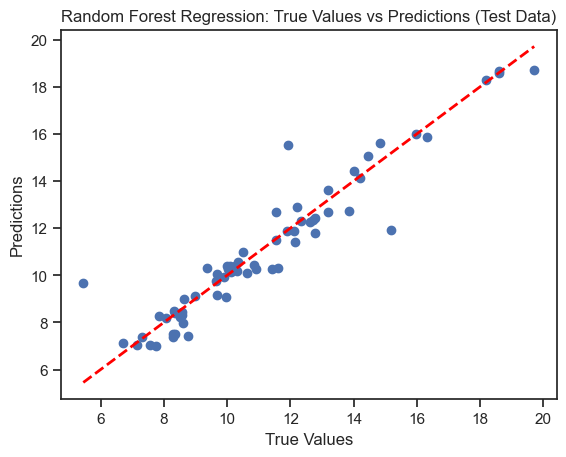

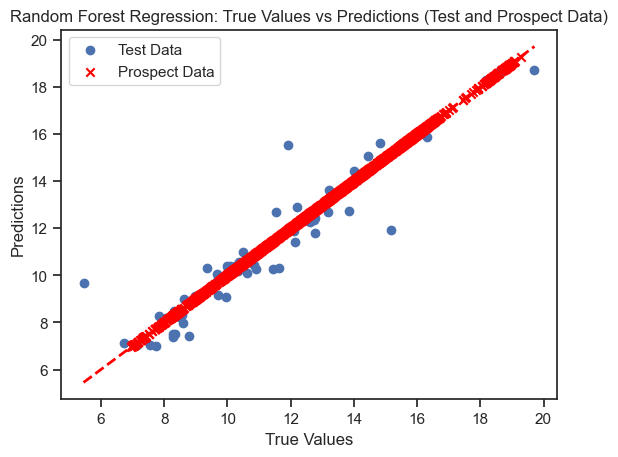

In [79]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest: RMSE = {rmse_rf}, R2 = {r2_rf}, MAE = {mae_rf}')

# Prospect features
prospect_features = numericplDF[['Total_Funding_Amount_(in_000s_USD)', 'Number_of_Locations', 'Employees']]

# Predictions for prospect data
predictions_prospects = rf_model.predict(prospect_features)

# Determine potential customers based on a threshold
threshold = 0.5
potential_customers = numericplDF.loc[predictions_prospects > threshold]

numericplDF['Predicted_Revenue'] = predictions_prospects

# Select the top 100 potential customers
top_300_potential_customers = numericplDF.nlargest(300, 'Predicted_Revenue')

# Save the top 100 potential customers to a CSV file
top_300_potential_customers.to_csv('top_300_potential_customers.csv', index=False)

# Display the list of top 100 potential customers
print("Top 300 Potential Customers:")
print(top_300_potential_customers)


# Plot predicted values vs true values for the test data
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression: True Values vs Predictions (Test Data)')
plt.show()

# Scatter plot for the test data
plt.scatter(y_test, y_pred_rf, label='Test Data')

# Scatter plot for the prospect data
plt.scatter(predictions_prospects, predictions_prospects, label='Prospect Data', marker='x', c='red')

# Plot diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Labeling and Title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Random Forest Regression: True Values vs Predictions (Test and Prospect Data)')
plt.show()


### Catboost Regressor using Revenue as target variable

CatBoost: RMSE = 0.9825419939927019, R2 = 0.8959699225304298, MAE = 0.6424603532539223
Top 300 Potential Customers of Cat Boost Regressor:
     CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
596  369938550        1924.0              18.825025   
108   26968154        2006.0              16.908029   
191  459073254        2015.0              19.483773   
567   68863214        1984.0              16.454568   
122   39469842        1918.0              17.713573   
..         ...           ...                    ...   
617  345458296        2008.0              15.404441   
262   37323650        1986.0              15.481825   
215   29803080        1971.0              15.409185   
786    8258381        1984.0              15.261503   
112   11126273        1962.0              15.684450   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
596                                      7491601.0   
108                                      2864225.0   
191                                   

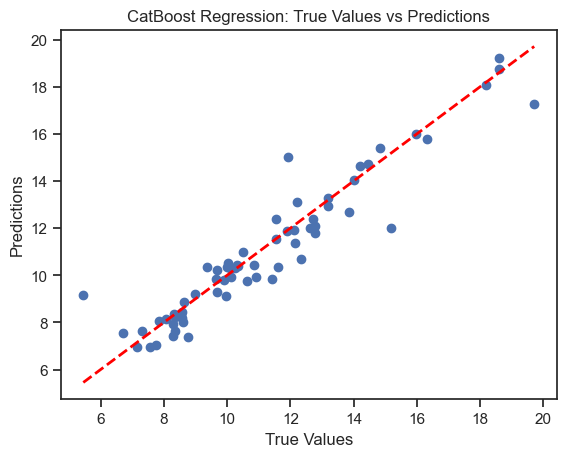

In [84]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the CatBoost Regressor model
catboost_model = CatBoostRegressor(n_estimators=1000, verbose=0, random_state=42)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE for the test data
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)
r2_catboost = r2_score(y_test, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)

print(f'CatBoost: RMSE = {rmse_catboost}, R2 = {r2_catboost}, MAE = {mae_catboost}')

# Prospect features
prospect_features_CBR = numericplDF[['Total_Funding_Amount_(in_000s_USD)', 'Number_of_Locations', 'Employees']]

# Predictions for prospect data
predictions_prospects_CBR = catboost_model.predict(prospect_features_CBR)

# Determine potential customers based on a threshold
threshold = 0.5
potential_customers_CBR = numericplDF.loc[predictions_prospects_CBR > threshold]

numericplDF['Predicted_Revenue_CBR'] = predictions_prospects_CBR

# Select the top 100 potential customers
top_300_potential_customers_CBR = numericplDF.nlargest(300, 'Predicted_Revenue_CBR')  # Replace with the actual column name

# Save the top 100 potential customers to a CSV file
top_300_potential_customers_CBR.to_csv('top_300_potential_customers_CBR.csv', index=False)

# Display the list of top 100 potential customers
print("Top 300 Potential Customers of Cat Boost Regressor:")
print(top_300_potential_customers_CBR)


# Plot predicted values vs true values
plt.scatter(y_test, y_pred_catboost)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('CatBoost Regression: True Values vs Predictions')
plt.show()


### Comparing and merging the predicted potential customers generated through Random Forest and Catboost

In [88]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv('top_300_potential_customers.csv')
df2 = pd.read_csv('top_300_potential_customers_CBR.csv')

# Merge the DataFrames on the 'CompanyID' column
common_company_ids = pd.merge(df1, df2, on='CompanyID', how='inner')

# Specify the columns you want to display
selected_columns = ['CompanyID', 'Revenue_(in_000s_USD)_x', 'Predicted_Revenue_y', 'Predicted_Revenue_CBR']

# Display the head of 20 companies with specific columns
common_company_ids[selected_columns].head(20)

,CompanyID,Revenue_(in_000s_USD)_x,Predicted_Revenue_y,Predicted_Revenue_CBR
0,155353090,20.262490,19.273038,17.796371
1,369938550,18.825025,19.110898,19.754037
2,459073254,19.483773,19.076607,19.287152
3,5851944,17.601113,19.075291,18.790287
4,60720958,16.349207,19.067816,18.711077
5,459963342,17.507012,19.067816,18.589698
6,68863214,16.454568,19.056537,19.287152
7,130203765,18.116666,18.995942,18.167157
8,3444162,19.733086,18.995942,17.588520
9,141738322,19.183449,18.984211,18.857174


In [89]:
common_company_ids.to_csv('common_company_ids.csv', index=False)


In [94]:
selected_columns = ['CompanyID', 'Revenue_(in_000s_USD)', 'Predicted_Revenue_CBR']

top_300_potential_customers_CBR[selected_columns].head(20)


,CompanyID,Revenue_(in_000s_USD),Predicted_Revenue_CBR
596,369938550,18.825025,19.754037
108,26968154,16.908029,19.350367
191,459073254,19.483773,19.287152
567,68863214,16.454568,19.287152
122,39469842,17.713573,19.120187
61,31342638,17.727844,19.079360
84,24182874,16.958913,19.055719
139,20775334,18.368787,19.055719
82,18633856,16.581704,19.037306
103,6275089,18.150564,19.031515
